# Medical Cost Personal Datasets
Insurance Forecast by using Linear Regression

---

## About Dataset

---

### Context

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

---

### Content
_Columns_:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

---

### Acknowledgements
The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets).

---

### Inspiration
Can you accurately predict insurance costs?

---

Source: [Kaggle Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

# Part 1: Data Preprocessing

## Importing the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/insurance.csv')

## Data Exploration

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# `charges` is the dependent variable (target) we need to predict\
# using the independent variables (features)

In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# columns with categorical values
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [8]:
len(dataset.select_dtypes(include='object').columns)

3

In [9]:
# check columns with numerical values
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

In [11]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by the categorical columns: 'sex', 'smoker', and 'region'.

In [12]:
dataset.groupby('sex').mean()

<ipython-input-12-859a65e13e71>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [13]:
dataset.groupby('smoker').mean()

<ipython-input-13-7a7d40b4bb92>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [14]:
dataset.groupby('region').mean()

<ipython-input-14-a56bc4f3bc6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with Missing Values

In [15]:
dataset.isnull().values.any() # no missing values

False

In [16]:
dataset.isnull().values.sum()

0

## Encoding the Categorical Data

In [17]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [18]:
# check unique values for each categorical data columns
dataset['sex'].unique(), dataset['smoker'].unique(), dataset['region'].unique()

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

In [19]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [20]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [21]:
dataset.shape

(1338, 9)

## Correlation Matrix

In [22]:
dataset_2 = dataset.drop(columns='charges')

In [23]:
# correlate the target `charges` with the independent variables
dataset_2.corrwith(dataset['charges'])

age                 0.299008
bmi                 0.198341
children            0.067998
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
dtype: float64

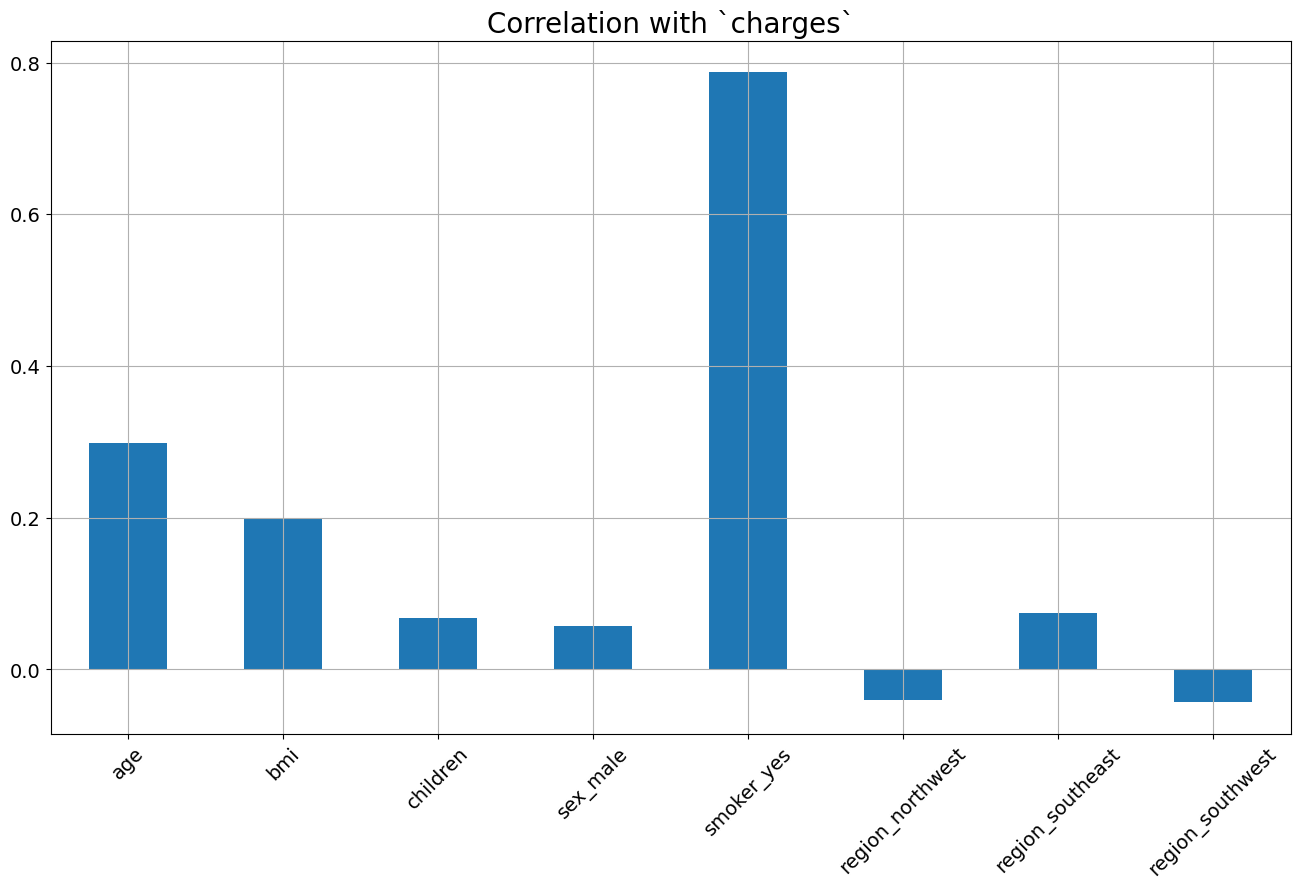

In [24]:
# plot the above correlation
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9),
    # title='Correlation with `charges`',
    fontsize=14,
    rot=45,
    grid=True,
)
plt.title('Correlation with `charges`', fontsize=20);

In [25]:
# define correlation matrix
corr = dataset.corr()

<Axes: >

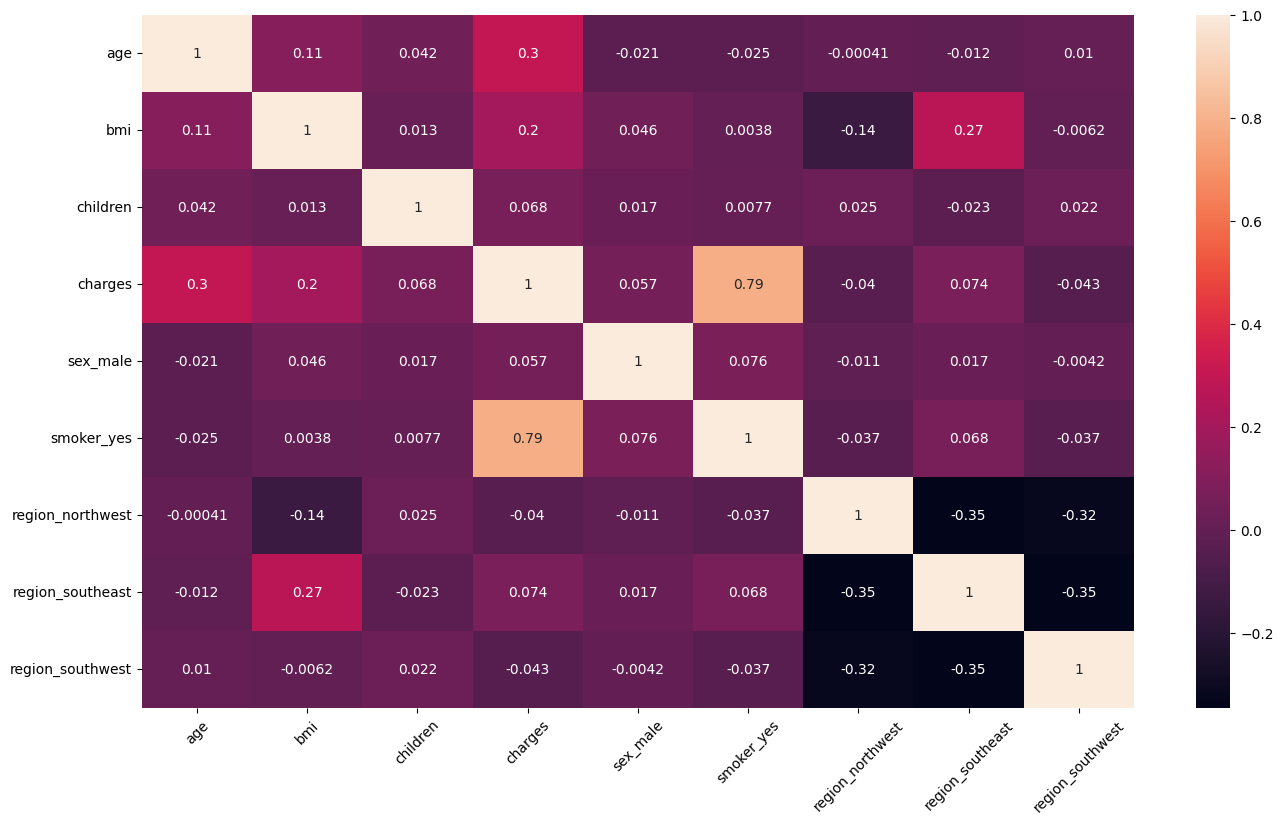

In [26]:
# draw heatmap of the correlation matrix
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
sns.heatmap(corr, annot=True)

## Split the Dataset into X & y (Train & Test)

In [27]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [28]:
# matrix of features / independent variables
X = dataset.drop(columns='charges')

In [29]:
# target / dependant variable
y = dataset['charges']

In [30]:
# split the dataset into X & y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    )

In [31]:
# check the shape of the X & y datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 8), (1070,), (268, 8), (268,))

## Feature Scaling

In [32]:
# Standardize features by removing the mean and scaling to unit variance.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [34]:
X_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the Model

## 1. Multiple Linear Regression

Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [35]:
# train our ML model using Linear Regression
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# make predictions
y_pred= regressor_lr.predict(X_test)

In [37]:
# evaluate our model using R^2 (the coefficient of determination)
# "Best possible score is 1.0 and it can be negative [..]""
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

from sklearn.metrics import r2_score

In [38]:
r2_lr = r2_score(y_test, y_pred)

In [39]:
results_lr = pd.DataFrame(
    [['Linear Regression', r2_lr]],
    columns=['Model', 'R^2']
)
results_lr

,Model,R^2
0,Linear Regression,0.799988


## 2. Random Forest Regression

In [40]:
# train our ML model using the Random Forest Regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
# make predictions
y_pred = regressor_rf.predict(X_test)

In [42]:
# evaluate our model using R^2 (the coefficient of determination)
r2_rf = r2_score(y_test, y_pred)

In [43]:
results_rf = pd.DataFrame(
    [['Random Forest Regressor', r2_rf]],
    columns=['Model', 'R^2']
)

results_rf

,Model,R^2
0,Random Forest Regressor,0.876379


## 3. XGBoost Regression

In [44]:
from xgboost import XGBRFRegressor

regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [45]:
y_pred = regressor_xgb.predict(X_test)

In [46]:
r2_xgb = r2_score(y_test, y_pred)

In [47]:
results_xgb = pd.DataFrame(
    [['XGBRFRegressor', r2_xgb]],
    columns=['Model', 'R^2']
)

results_xgb

,Model,R^2
0,XGBRFRegressor,0.895397


In [48]:
results = pd.concat([results_lr, results_rf, results_xgb])
results

,Model,R^2
0,Linear Regression,0.799988
0,Random Forest Regressor,0.876379
0,XGBRFRegressor,0.895397


# Part 3: Predicting Charges for a New Customer - Predict a Single Observation

Name: Frank, age: 40, sex: 1, bmi: 45.50, children: 4, smoker: 1, region: northeast

In [49]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Example 1

In [50]:
frank_obs = [
    [40, 45.5, 4, 1, 1, 0, 0, 0]
]

In [51]:
frank_obs

[[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [52]:
regressor_xgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43257.93], dtype=float32)

In [53]:
# regressor_rf.predict(sc.transform(frank_obs))

In [54]:
# regressor_lr.predict(sc.transform(frank_obs))

## Example 2

Name: Sara, age: 19, bmi: 27.9, children: 0, sex: female, smoker: no, region: northwest

In [55]:
sara_obs = [
    [19, 27.9, 0, 0, 0, 1, 0, 0]
]

In [56]:
sara_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [57]:
regressor_xgb.predict(sc.transform(sara_obs))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2441.4966], dtype=float32)

In [58]:
# regressor_rf.predict(sc.transform(sara_obs))

In [59]:
# regressor_lr.predict(sc.transform(sara_obs))